#ANALYSIS OF BANK MARKETING DATA

###Loading required libraries:

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mt
import warnings
sns.set_style("darkgrid")
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
os.getcwd()
warnings.filterwarnings('ignore')


C:\Users\leand\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
bankdata=pd.read_csv('bank.csv',sep=';')

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [6]:
bankdata.head(15)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [7]:
bankdata.shape

(4521, 17)

In [8]:
bankdata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

####Checking fo missing data:

In [9]:
bankdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

####distribution of savings account balances:

(-2000, 20000)

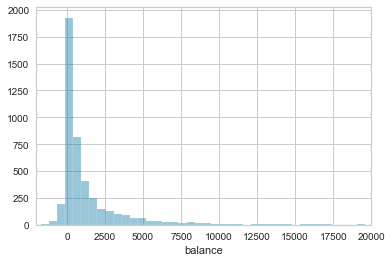

In [10]:
sns.distplot(bankdata.balance,kde=False,bins=140)
plt.xlim(-2000,20000)

####distribution of ages of customers:

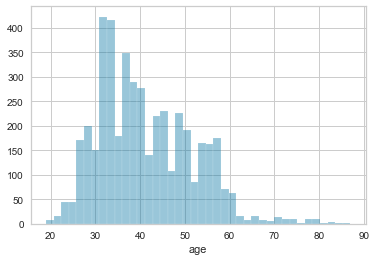

In [11]:
sns.distplot(bankdata.age,kde=False,bins=40)

####Does education have any relation to getting a term deposit: 

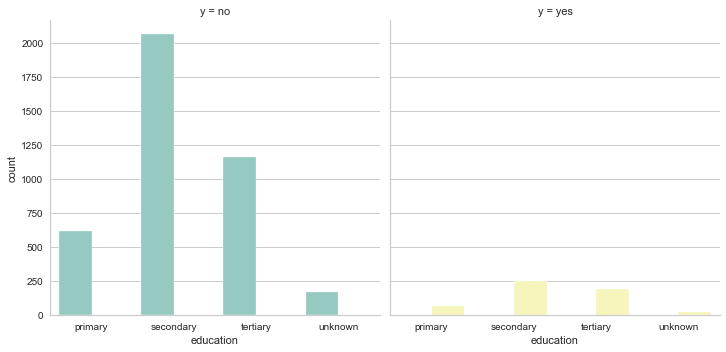

In [12]:
sns.set_style("whitegrid")
sns.catplot(data=bankdata,x='education',palette='Set3',hue='y',col='y',kind='count')

####Does marital status have any relation to getting a term deposit: 

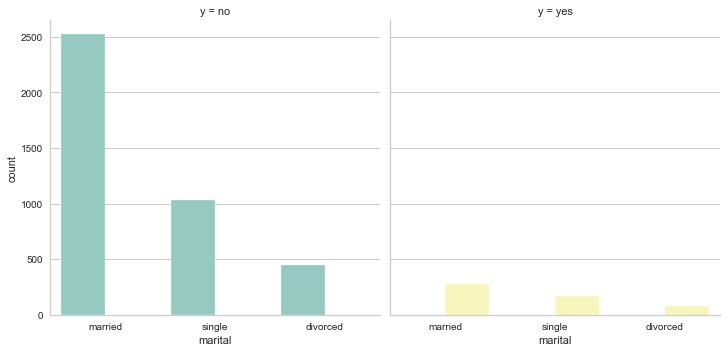

In [13]:
sns.catplot(data=bankdata,x='marital',palette='Set3',hue='y',col='y',kind='count')

####Checking if customer balance is a factor in getting a term deposit: 
>since there are a large number of outliers ,trim the balance column of the dataset to reduce the affect of outliers

(0, 10000)

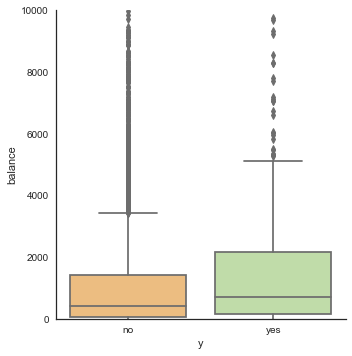

In [14]:
sns.set_style("white")
sns.catplot(x="y", y="balance", kind="box", data=bankdata,palette='Spectral')
plt.ylim(0,10000)

In [15]:
bankdata[(bankdata['balance']<1800)&(bankdata['balance']>-1000)].shape


(3535, 17)

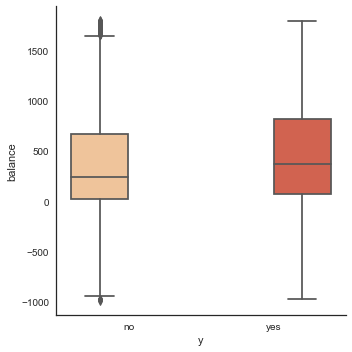

In [16]:
bankdata_new=bankdata[(bankdata['balance']<1800)&(bankdata['balance']>-1000)]
sns.catplot(x="y", y="balance", kind="box", data=bankdata_new,palette='OrRd',hue='y')


###Do the kinds of jobs people do have any relation with getting a term deposit

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

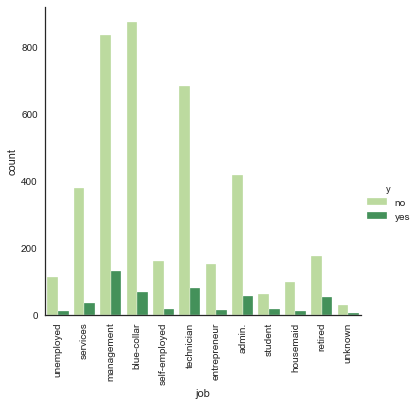

In [17]:
sns.catplot(data=bankdata,x='job',palette='YlGn',kind='count',hue='y')
plt.xticks(rotation='vertical')

###Does having a housing loan have any relation with getting a term deposit

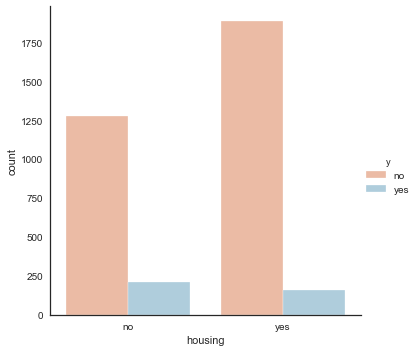

In [18]:
sns.catplot(data=bankdata_new,x='housing',palette='RdBu',kind='count',hue='y')

###Does engagement with the customer though campaigns and frequent contact  have any relation with getting a term deposit

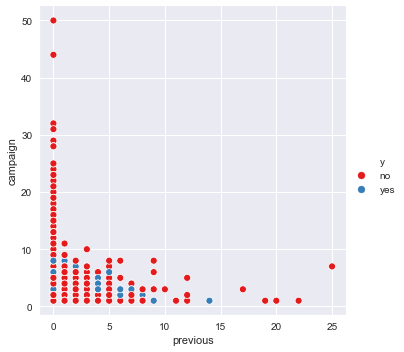

In [19]:

sns.set_style("darkgrid")
sns.relplot(data=bankdata_new,x='previous',y='campaign',hue='y',palette='Set1')

###Using the chi square test of independence on the categoical variables:

>Encoding the categorical data using the label encoder class

In [20]:
categorical_data=bankdata_new.iloc[:,[2,3,4,6,7,16]]
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [21]:
label = lambda x: enc.fit_transform(x)

categorical_encoded=categorical_data.apply(label)
categorical_encoded

,marital,education,default,housing,loan,y
0,1,0,0,0,0,0
2,2,2,0,1,0,0
3,1,2,0,1,1,0
4,1,1,0,1,0,0
5,2,2,0,0,0,0
...,...,...,...,...,...,...
4515,2,1,0,1,0,0
4516,1,1,0,1,0,0
4518,1,1,0,0,0,0
4519,1,1,0,0,0,0


In [22]:
X=categorical_encoded.iloc[:,:-1]
Y=categorical_encoded.iloc[:,[-1]]


###Housing loan and personal loan  features have the highest chi square scores:

In [23]:
features=SelectKBest(score_func=chi2,k=2)
features.fit_transform(X,Y)

pd.DataFrame((features.scores_))

,0
0,0.207838
1,2.198997
2,0.337157
3,15.796053
4,10.249799


###none of the numerical features are too correlated with each other:

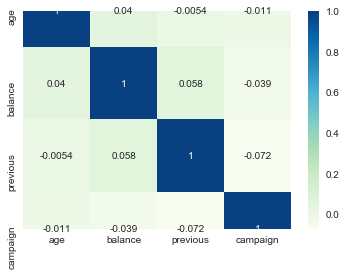

In [24]:
sns.heatmap(bankdata_new.loc[:,['age','balance','previous','campaign']].corr(),annot=True,cmap='GnBu')

###The final dataset
>The numerical features have been chosen through trial and error

In [25]:
bankdata_final_features=bankdata_new.iloc[:,[0,5,6,7,16]]
df1=bankdata_final_features.iloc[:,[2,3,4]].apply(label)
df2=bankdata_final_features.drop(['housing','loan','y'],axis=1)
final_data=pd.concat([df1,df2],axis=1)
final_data

,housing,loan,y,age,balance
0,0,0,0,30,1787
2,1,0,0,35,1350
3,1,1,0,30,1476
4,1,0,0,59,0
5,0,0,0,35,747
...,...,...,...,...,...
4515,1,0,0,32,473
4516,1,0,0,33,-333
4518,0,0,0,57,295
4519,0,0,0,28,1137


In [26]:
final_data_features=final_data.iloc[:,[0,1,3,4]]
final_data_target=final_data.iloc[:,[2]]

###Splitting into train and test data:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(final_data_features,final_data_target,random_state=1,shuffle=True,test_size=0.2)

###It is clearly evident from the above graphs that there exists a sizable class imbalance in the data in favo of people who do not have a term deposit.
>To overcome this we oversample the minority class.

In [39]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler


over = SMOTE()
under = RandomUnderSampler()

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_SMOTE, y_SMOTE = pipeline.fit_resample(X_train, y_train)


###Scaling and standardizing the features as age and balance are relatively large and they shouldnt ovecontribute:

In [40]:
pre_process = ColumnTransformer([
                      ('scale',StandardScaler(),['housing','loan','age','balance']) ])

###Training the data on the below 5 models and using class balanced accuracy as a model selector:
- KNN
- Support Vector Machine(linear kernel)
- Decision tree
- Random Forest
- Linear Discriminant analysis

In [41]:
pipelines = []
pipelines.append(('SCALEDKNN', Pipeline([('PR',pre_process),('KNN', KNeighborsClassifier(n_neighbors=17))])))
pipelines.append(('ScaledSVC', Pipeline([('PR',pre_process),('SVC',SVC() )])))
pipelines.append(('ScaledTREE', Pipeline([('PR',pre_process),('DECISON_TREE',DecisionTreeClassifier(random_state=0))])))
pipelines.append(('ScaledRF', Pipeline([('PR',pre_process),('RANDON_FOREST',RandomForestClassifier(n_estimators=150) )])))
pipelines.append(('ScaledLDA', Pipeline([('PR',pre_process),('LDA',LinearDiscriminantAnalysis() )])))

results = []
names = []

for name, model in pipelines:
    cv_results = cross_val_score(model, X_SMOTE, y_SMOTE, cv=5, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    

SCALEDKNN: 0.737308 (0.014333)
ScaledSVC: 0.711923 (0.011466)
ScaledTREE: 0.772151 (0.011038)
ScaledRF: 0.777848 (0.011703)
ScaledLDA: 0.709957 (0.011927)


###Plotting their confusion matrices:

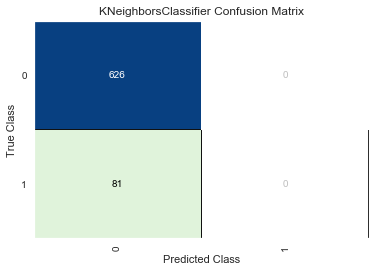

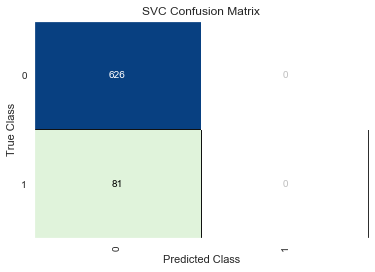

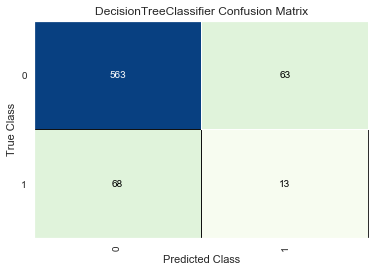

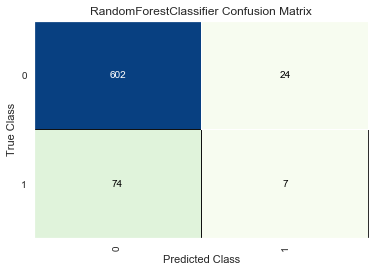

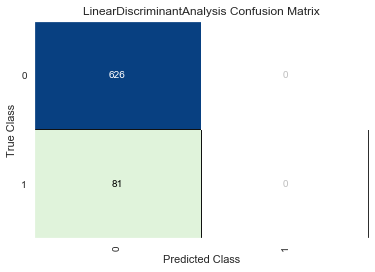

In [31]:
for name, model in pipelines:
    model.fit(X_train,y_train)
    cm = ConfusionMatrix(model, classes=[0,1],cmap='GnBu')
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

In [43]:
RF=RandomForestClassifier().fit(X_SMOTE,y_SMOTE)
y_pred=RF.predict(X_test)
accuracy_score(y_test, y_pred)

0.7213578500707214